### Bank marketing Dataset:
- This dataset has been dowloaded from UCI Machine Learning Repository. Is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be (‘yes’) or not (‘no’) subscribed.

- All the features are described here: https://archive.ics.uci.edu/ml/datasets/bank+marketing

### Loading Libraries and dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

from pandas.tools.plotting import scatter_matrix

from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.preprocessing import Imputer
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


%matplotlib inline

plt.rcParams["figure.dpi"] = 100
plt.rcParams["figure.figsize"] = (5,5)

data_df = pd.read_csv("C:/Users/phani/Desktop/datase/Bank-Marketing-Data-Analysis-master/marketing-data.csv")
data_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,is_success
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


### Data Exploration

In [3]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age           45211 non-null int64
job           45211 non-null object
marital       45211 non-null object
education     45211 non-null object
default       45211 non-null object
balance       45211 non-null int64
housing       45211 non-null object
loan          45211 non-null object
contact       45211 non-null object
day           45211 non-null int64
month         45211 non-null object
duration      45211 non-null int64
campaign      45211 non-null int64
pdays         45211 non-null int64
previous      45211 non-null int64
poutcome      45211 non-null object
is_success    45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


#### There are we have 45211 observations of 17 variables (7-Numerical Variables and 10-Categorical Variables).

In [4]:
data_df.apply(lambda x: sum(x.isnull()), axis = 0 )

age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
is_success    0
dtype: int64

In [5]:
data_df.shape

(45211, 17)

In [6]:
# head
print(data_df.head())

   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome is_success  
0  unknown    5   may       261         1     -1         0  unknown         no  
1  unknown    5   may       151         1     -1         0  unknown         no  
2  unknown    5   may        76         1     -1         0  unknown         no  
3  unknown    5   may        92         1     -1         0  unknown         no  
4  unknown    5   may       198         1     -1         0  unknown         no  


In [7]:
# Target variable distribution
count = data_df.groupby('is_success').size()
percent = count/len(data_df)*100
print(percent)

is_success
no     88.30152
yes    11.69848
dtype: float64


From the distribution of Target variable: "is_success" it is found that data is imbalanced becouse there is approx 88% is 'no' and 12% is 'yes'.

In [8]:
### looking at continous variables
data_df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [9]:
### Descriptive Statistics for categorical variables
data_df.describe(include=["object"])

,job,marital,education,default,housing,loan,contact,month,poutcome,is_success
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,9732,27214,23202,44396,25130,37967,29285,13766,36959,39922


In [10]:
categorical_vars = data_df.describe(include=["object"]).columns
continous_vars = data_df.describe().columns
categorical_vars

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'is_success'],
      dtype='object')

In [11]:
continous_vars

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

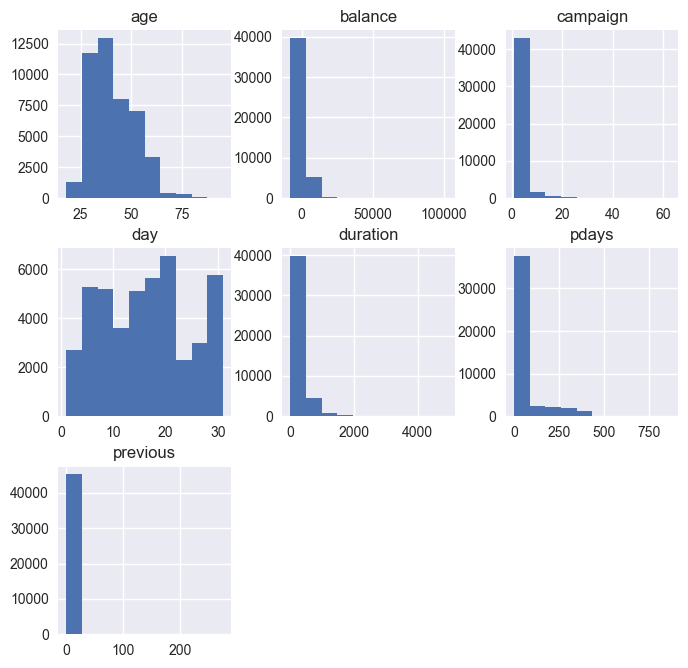

In [12]:
_ = data_df.hist(continous_vars, figsize = (8,8))

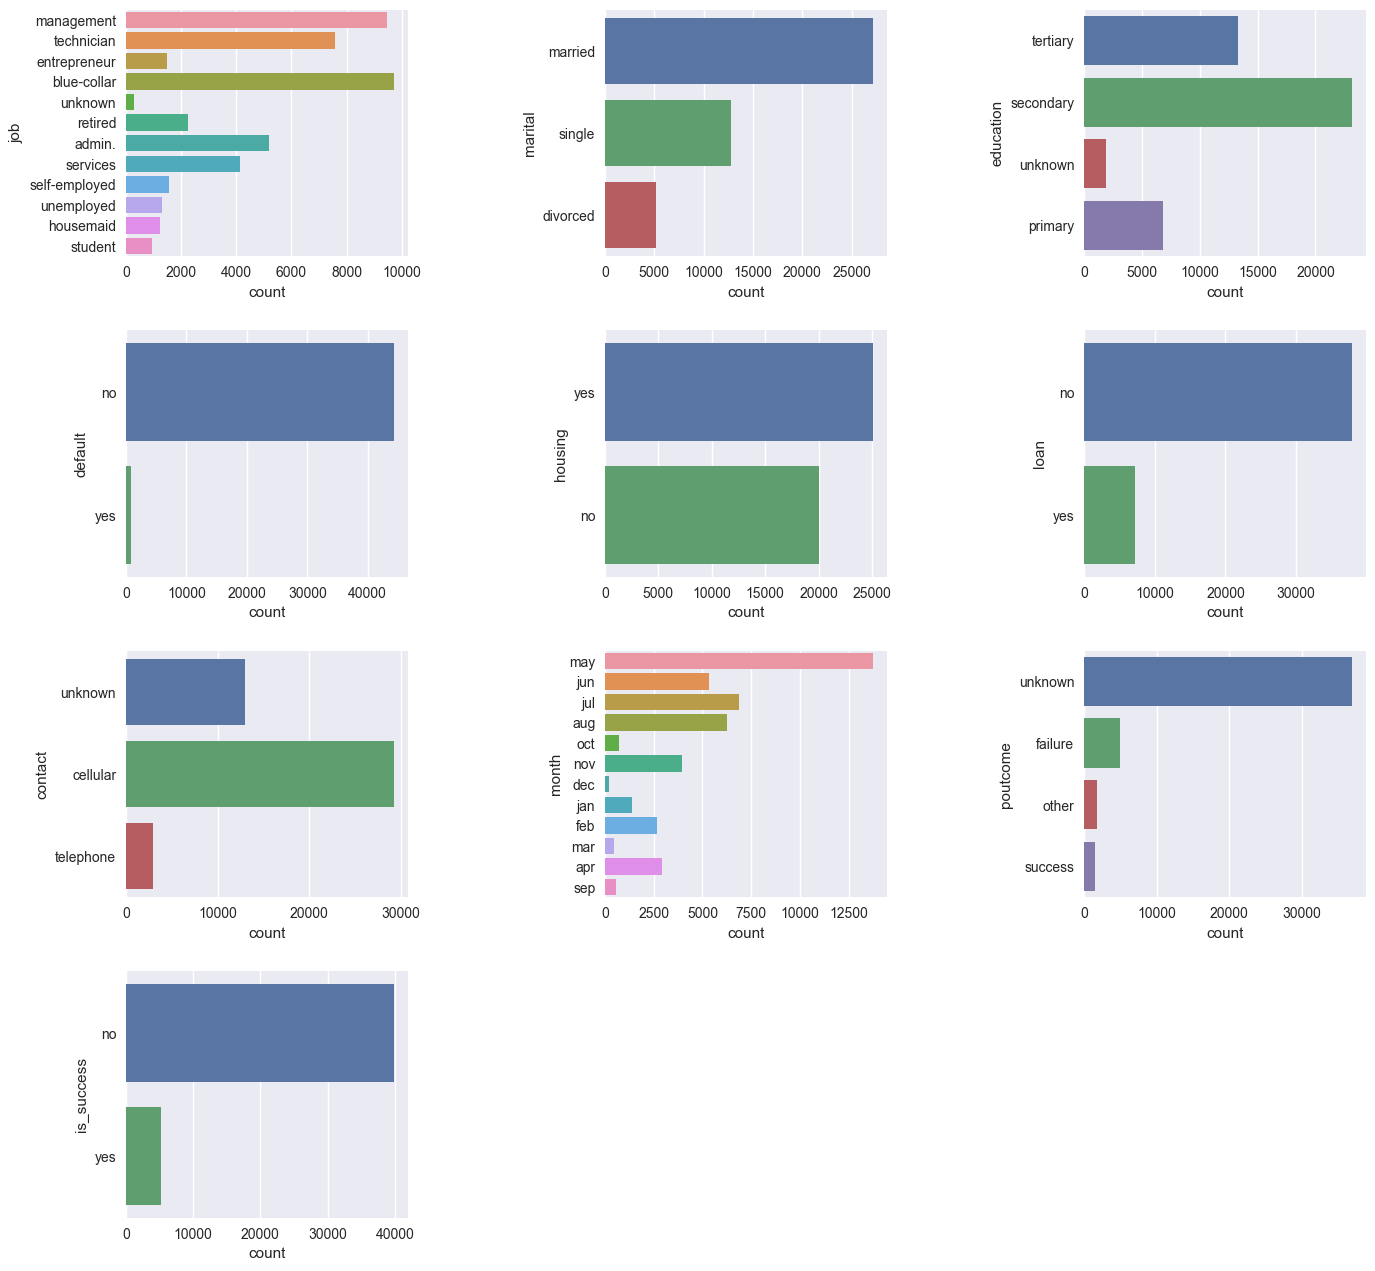

In [13]:
import seaborn as sb
# Count plots of categorical variables

fig, axes = plt.subplots(4, 3, figsize=(16, 16))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.7, hspace=0.3)

for i, ax in enumerate(axes.ravel()):
    if i > 9:
        ax.set_visible(False)
        continue
    sb.countplot(y = categorical_vars[i], data=data_df, ax=ax)

In [14]:
data_df.describe(include = ['object'])

,job,marital,education,default,housing,loan,contact,month,poutcome,is_success
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,9732,27214,23202,44396,25130,37967,29285,13766,36959,39922


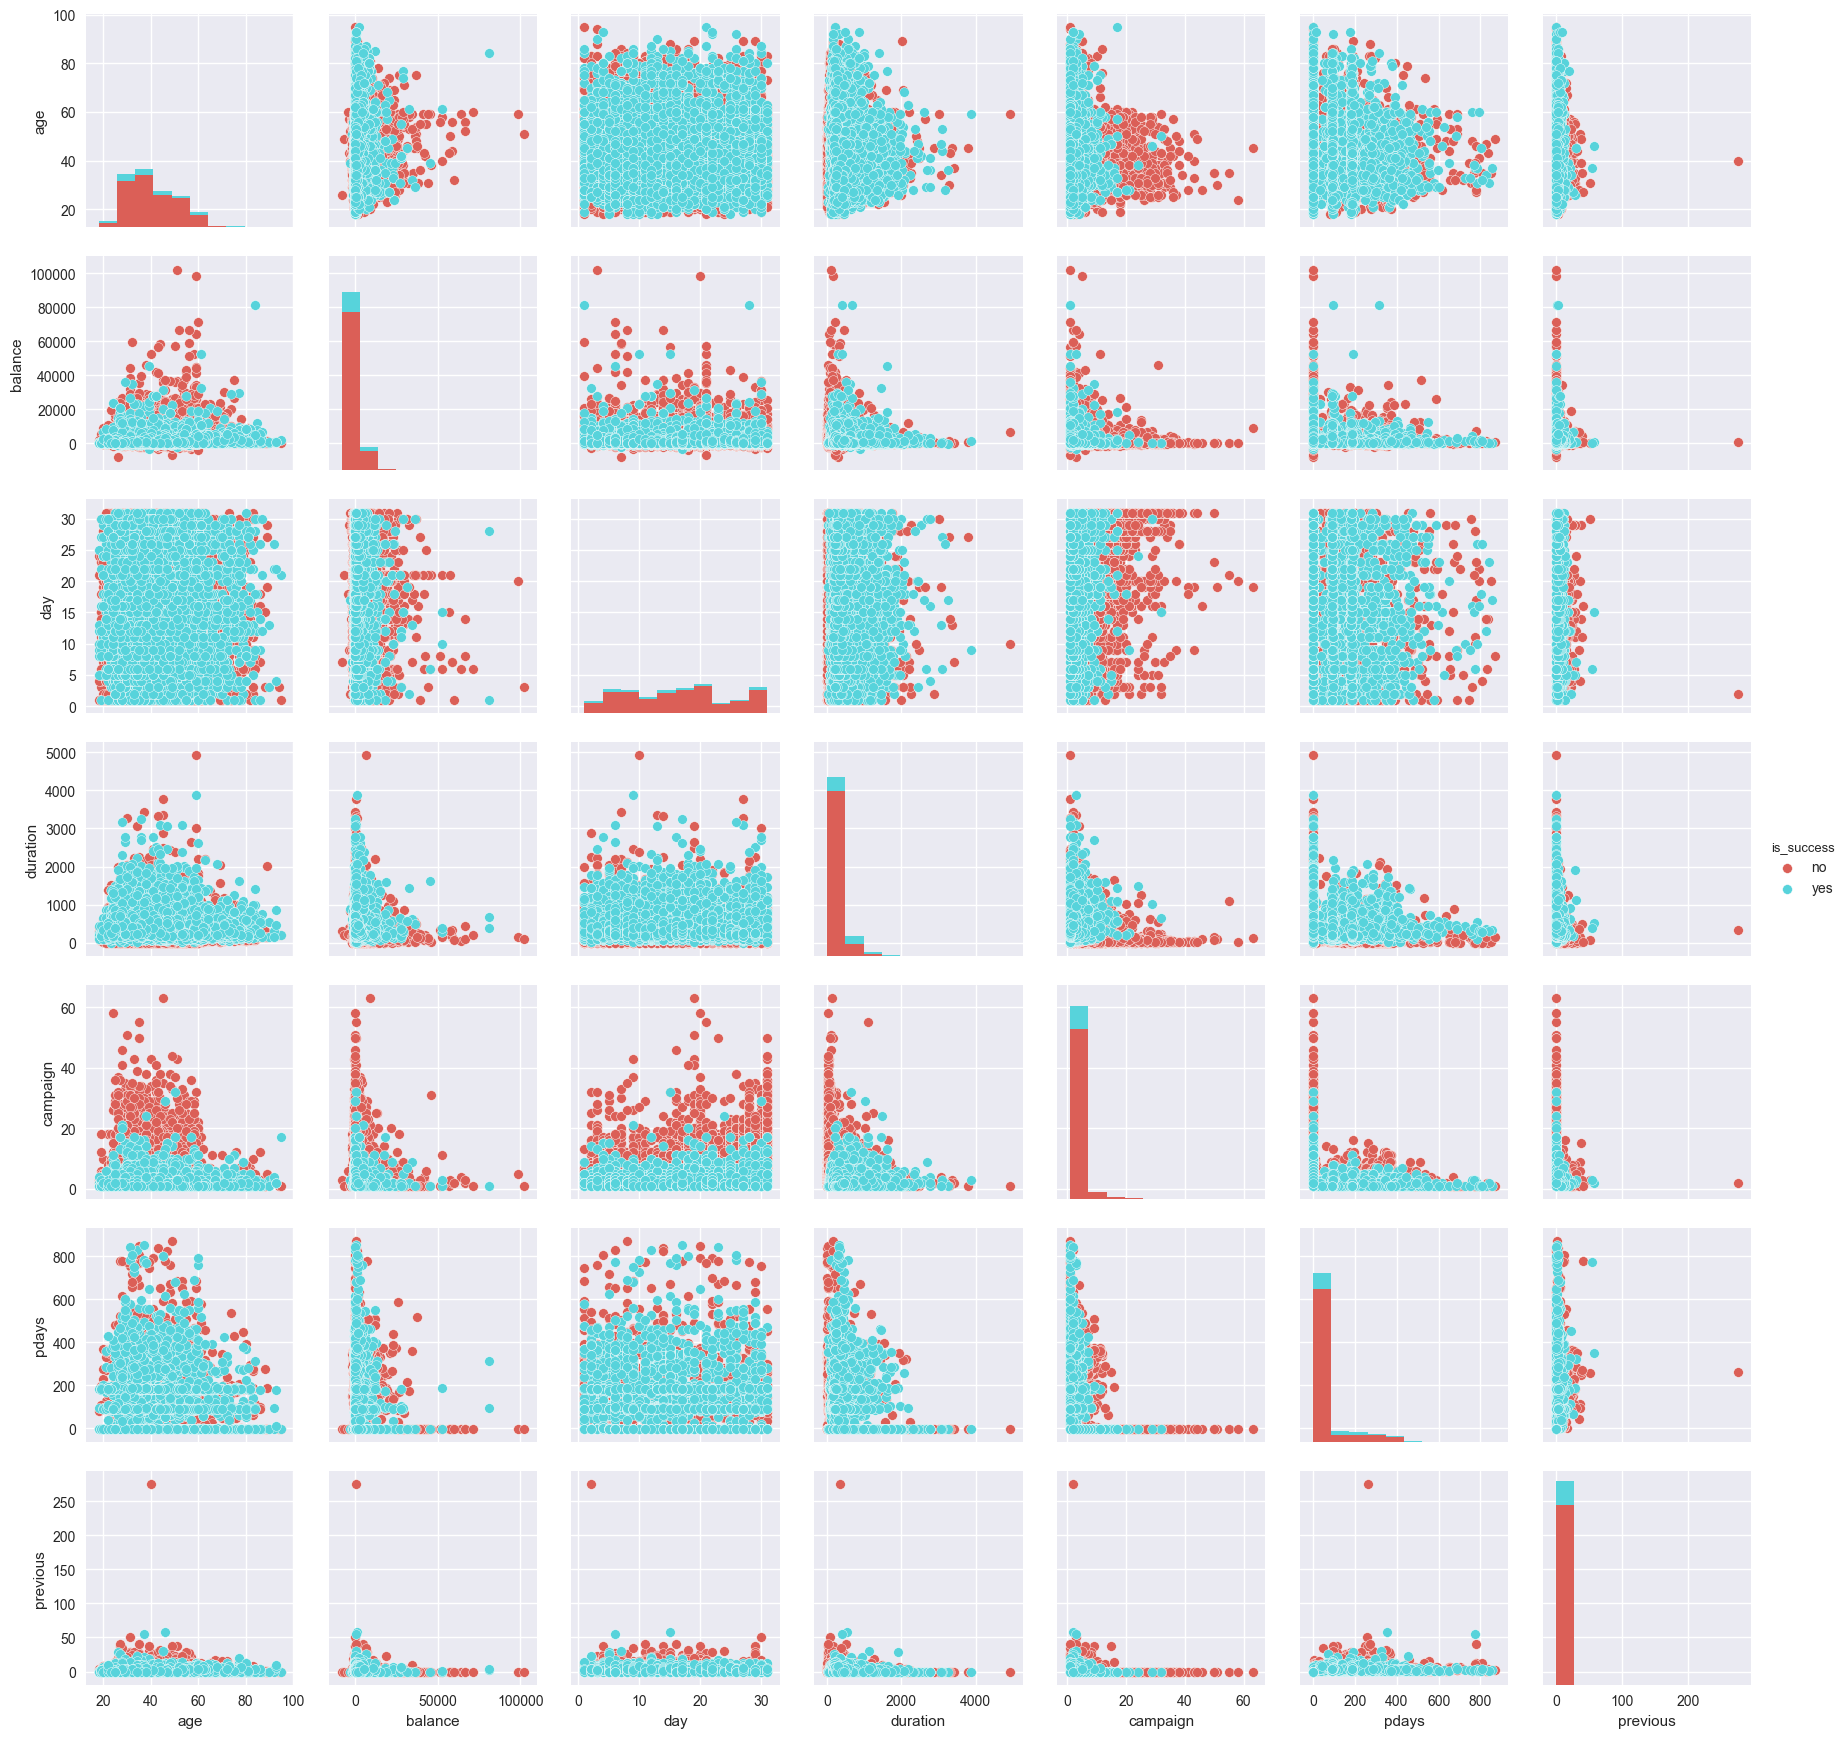

In [15]:
sb.pairplot(data_df, hue='is_success', palette='hls')

From the pariplots we can see that there is no strong relationship between these indepedent variables (no multicollinearity among these).

## Analysis of Indepedent Numerical Variables

I have did analysis of each individual variable and checking if there is any outlier values present.


- Outliers can be defined as values out of range [(Q1-1.5IQR) , (Q3+1.5IQR)] but here I choose a range based on Maximum and Minimum value for each variable selected by observing Boxplot of corresponding variable.

- After identify, Outlier values will be imputed by "mean" of respective variable by implementation of following "impute_outliers" function.

- here Q1-First Quartile(25%), Q2-Second Quartile(75%), IQR-Inter Quartile Range

In [16]:
# Impute outliers function
def impute_outliers(df, column , minimum, maximum):
    col_values = df[column].values
    df[column] = np.where(np.logical_or(col_values<minimum, col_values>maximum), col_values.mean(), col_values)
    return df

In [17]:
#lets see statistic of Numerical variables before Outlier treatment
data_df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


#### Analyzing Independent Numerical variables against Target variable 'is_success' by plotting Boxplot for outliers.

Age, Blanace, day, duration, campaign, pdays, previous

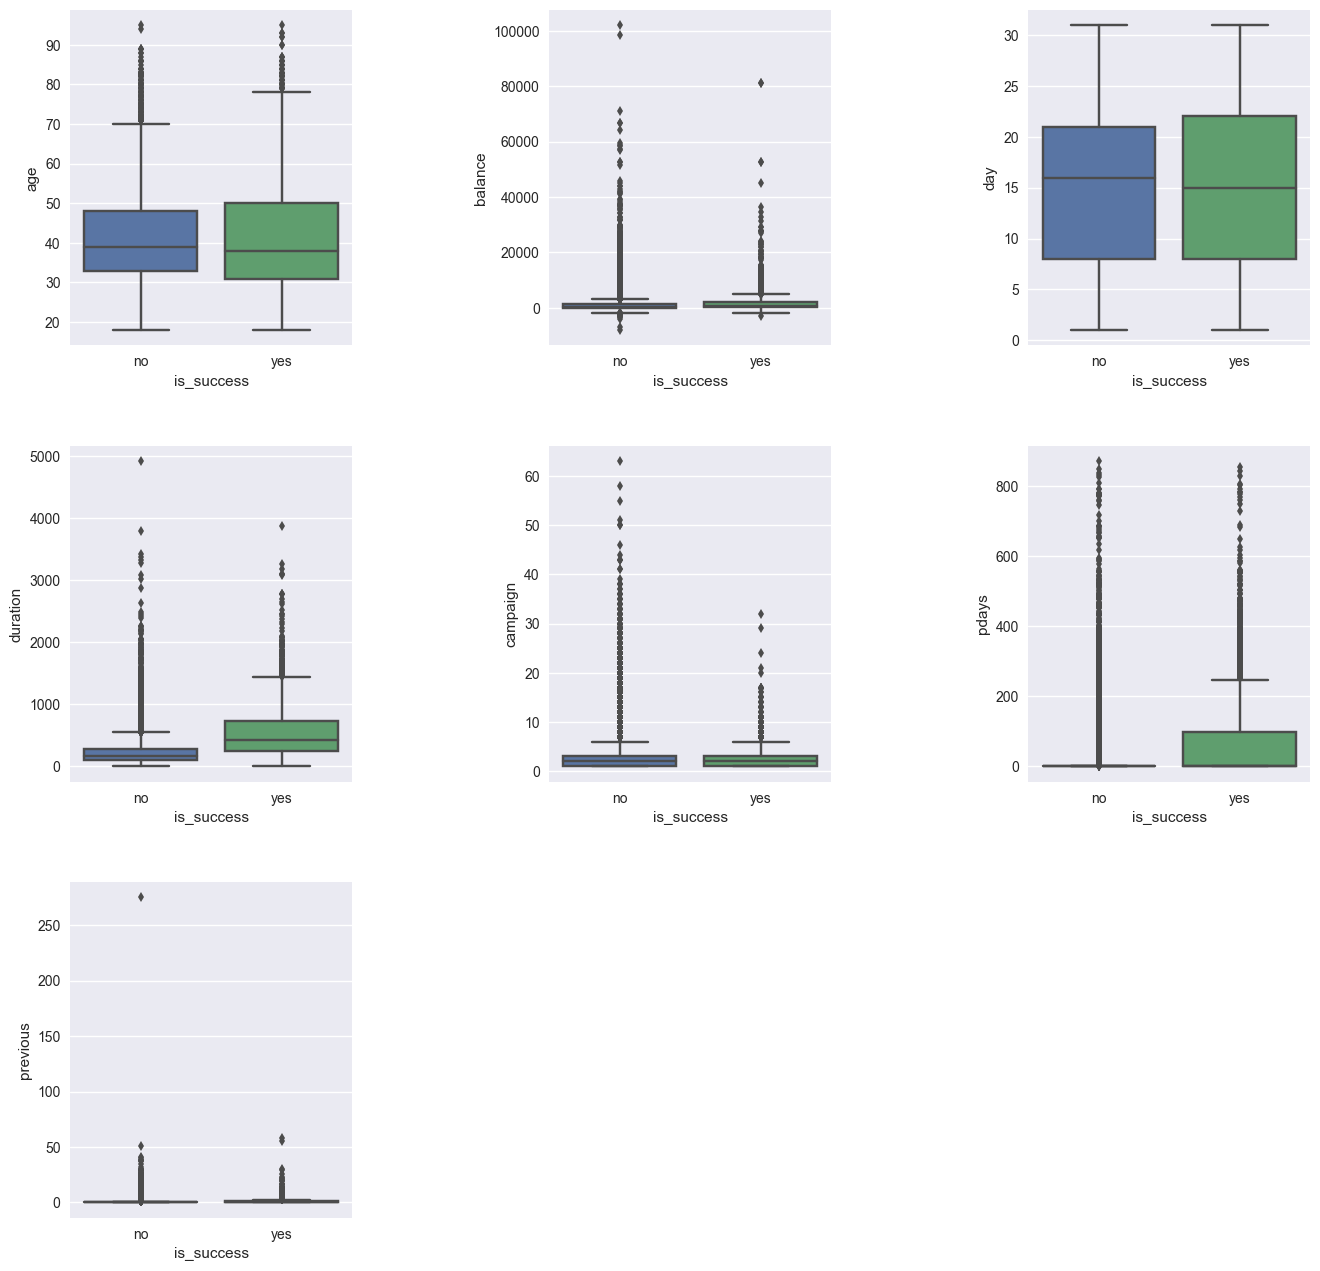

In [18]:
fig, axes = plt.subplots(3, 3, figsize=(16, 16))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.7, hspace=0.3)

for i, ax in enumerate(axes.ravel()):
    if i > 6:
        ax.set_visible(False)
        continue
    sb.boxplot(y = continous_vars[i], x = 'is_success', data=data_df, ax=ax)

In [19]:
# Fixing balance column
dataset_new = data_df
min_val = dataset_new["balance"].min()
max_val = 20000
dataset_new = impute_outliers(df=dataset_new, column='balance' , minimum=min_val, maximum=max_val)

In [20]:
# Fixing duration column
min_val = dataset_new["duration"].min()
max_val = 2000
dataset_new = impute_outliers(df=dataset_new, column='duration' , minimum=min_val, maximum=max_val)

In [21]:
# Fixing campaign column
min_val = dataset_new["campaign"].min()
max_val = 20
dataset_new = impute_outliers(df=dataset_new, column='campaign' , minimum=min_val, maximum=max_val)

In [22]:
# Fixing pdays column
min_val = dataset_new["pdays"].min()
max_val = 250
dataset_new = impute_outliers(df=dataset_new, column='pdays' , minimum=min_val, maximum=max_val)

In [23]:
# Fixing 'previous' column
min_val = dataset_new["previous"].min()
max_val = 15
dataset_new = impute_outliers(df=dataset_new, column='previous' , minimum=min_val, maximum=max_val)

In [24]:
#lets see statistic of Numerical variables after Outlier treatment
dataset_new.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1239.089967,15.806419,255.154379,2.630474,17.370434,0.520972
std,10.618762,2213.867032,8.322476,242.792228,2.456852,47.938636,1.512395
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1397.000000,21.000000,318.000000,3.000000,-1.000000,0.000000
max,95.000000,19985.000000,31.000000,1994.000000,20.000000,250.000000,15.000000


## Analysis of Indepedent Categorical ariables

- If any Categorical variable has more than 50% unknown values or seems highly unbalanced, I dropped that variable from dataset.
- If unknown values are less than 50% than I replaced them by Mode of respective variable by implementing following 'impute_unknowns' function.

In [25]:
# Impute unknowns function
def impute_unknowns(df, column):
    col_values = df[column].values
    df[column] = np.where(col_values=='unknown', data_df[column].mode(), col_values)
    return df

In [26]:
# Fixing 'job' column
dataset_new = impute_unknowns(df=dataset_new, column='job')

In [27]:
# Fixing 'education' column
dataset_new = impute_unknowns(df=dataset_new, column='education')

In [28]:
#dropping variable 'default'
del dataset_new['default']

contact
cellular     64.774059
telephone     6.427639
unknown      28.798301
dtype: float64


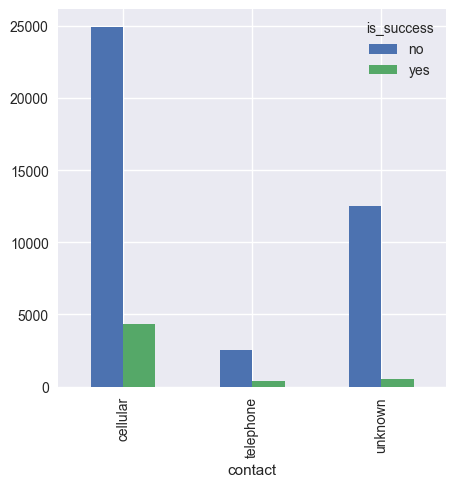

In [29]:
# "contact"
temp6 = pd.crosstab(data_df['contact'], data_df['is_success'])
temp6.plot(kind='bar')
print(data_df.groupby(['contact']).size()/len(data_df)*100)

In [30]:
# 'Contact' variable does not have any impact on target variable so we can drop this variable.
del dataset_new['contact']

In [31]:
# "poutcome" also have more than 81% missing values so we can drop this variable also.
#dropping variable 'poutcome'
del dataset_new['poutcome']

## New dataset afterall the transformations

In [32]:
dataset_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 14 columns):
age           45211 non-null int64
job           45211 non-null object
marital       45211 non-null object
education     45211 non-null object
balance       45211 non-null float64
housing       45211 non-null object
loan          45211 non-null object
day           45211 non-null int64
month         45211 non-null object
duration      45211 non-null float64
campaign      45211 non-null float64
pdays         45211 non-null float64
previous      45211 non-null float64
is_success    45211 non-null object
dtypes: float64(5), int64(2), object(7)
memory usage: 4.8+ MB


In [33]:
dataset_new.shape

(45211, 14)

# Feature Engineering

In [34]:
#Seperating Target variable from other variables
dataset_Y = dataset_new['is_success']
dataset_X = dataset_new[dataset_new.columns[0:12]]

In [35]:
#converting Independent Categorical into Numeriacal by creating Dummy variables
dataset_X_dummy = pd.get_dummies(dataset_X)
print(dataset_X_dummy.head())

   age  balance  day  duration  campaign  pdays  job_admin.  job_blue-collar  \
0   58   2143.0    5     261.0       1.0   -1.0           0                0   
1   44     29.0    5     151.0       1.0   -1.0           0                0   
2   33      2.0    5      76.0       1.0   -1.0           0                0   
3   47   1506.0    5      92.0       1.0   -1.0           0                1   
4   33      1.0    5     198.0       1.0   -1.0           0                1   

   job_entrepreneur  job_housemaid    ...      month_dec  month_feb  \
0                 0              0    ...              0          0   
1                 0              0    ...              0          0   
2                 1              0    ...              0          0   
3                 0              0    ...              0          0   
4                 0              0    ...              0          0   

   month_jan  month_jul  month_jun  month_mar  month_may  month_nov  \
0          0         

## Feature selection with PCA

In [121]:
#converting dataframe into numpy Array
X = dataset_X_dummy.values
Y = dataset_Y.values

# Split-out validation dataset
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [37]:
#Scaling the values
X_t = scale(X_train)
X_v = scale(X_validation)

#initially lets create 39 components which is actual number of Variables we have
pca = PCA(n_components=39)
pca.fit(X_v)
pca.fit(X_t)

#The amount of variance that each PC explains
var= pca.explained_variance_ratio_

#Cumulative Variance explains
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

var1

array([   7.71,   14.18,   19.73,   25.08,   29.26,   33.36,   37.08,
         40.67,   43.88,   46.95,   49.89,   52.77,   55.63,   58.42,
         61.15,   63.85,   66.52,   69.16,   71.77,   74.36,   76.95,
         79.49,   81.98,   84.36,   86.67,   88.9 ,   91.03,   92.99,
         94.77,   96.45,   97.75,   98.93,  100.  ,  100.  ,  100.  ,
        100.  ,  100.  ,  100.  ,  100.  ])

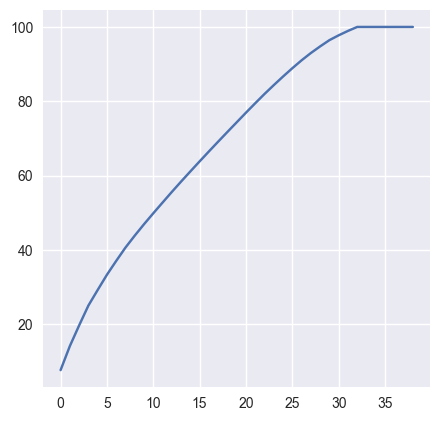

In [38]:
#lets see Cumulative Variance plot
plt.plot(var1)

Only 32 components are explaining nearly 100 % variablity in the data.

In [39]:
#Looking at above plot I'm taking 32 variables
pca = PCA(n_components=32)
pca.fit(X_t)
pca.fit(X_v)
X_train_PC=pca.fit_transform(X_t)
X_validation_PC = pca.transform(X_v)

# Model training

In [40]:
# Test options and evaluation metric
seed = 7
scoring = 'accuracy'

In [41]:
from sklearn.ensemble import RandomForestClassifier
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('K-NN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF',RandomForestClassifier()))
#models.append(('SVM', SVC()))

In [89]:
# evaluate each model in turn
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train_PC, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.891755 (0.005013)
LDA: 0.891202 (0.004555)
K-NN: 0.883958 (0.004866)
CART: 0.853241 (0.003570)
RF: 0.888659 (0.004922)


According to Accuracy and Computation Time Logistic Regression seems the best model

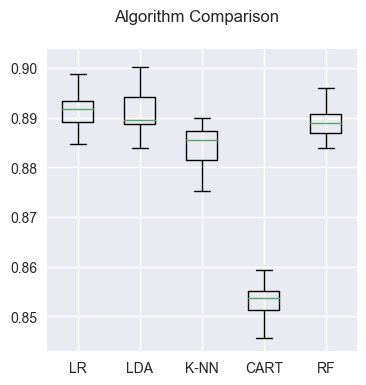

In [90]:
# Comparing Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)

In [88]:
Y_validation = Series(Y_validation)
Y_validation.value_counts()

no     8027
yes    1016
dtype: int64

## For now we can see that logistics regeression performs better. Since, this is a unbalanced data I am considering AUC as my metrics for evaluating the model.

# Logistics Regression Prediction

In [69]:
#Scaling the X_validation data
X_v = scale(X_validation)
pca.fit(X_v)
X_validation_PC=pca.fit_transform(X_v)

In [70]:
# Make predictions on validation dataset by choosing best Algorithm
from sklearn.cross_validation import cross_val_score
lr = LogisticRegression()
scores = cross_val_score(lr,X_train_PC, Y_train, cv =10, scoring = 'accuracy')
scores.mean()

0.89186568710161196

In [71]:
lr.fit(X_train_PC, Y_train)
predictions = lr.predict(X_validation_PC)
print("Accuracy : ", accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

Accuracy :  0.882892845295
[[7744  283]
 [ 776  240]]
             precision    recall  f1-score   support

         no       0.91      0.96      0.94      8027
        yes       0.46      0.24      0.31      1016

avg / total       0.86      0.88      0.87      9043



In [192]:
def rocplots(model, X_train_PC, Y_train):
    model.fit(X_train_PC, Y_train)
    probs = model.predict_proba(X_validation_PC)
    preds = probs[:,1]
    fpr, tpr, threshold = metrics.roc_curve(Y_validation, preds, pos_label='yes')
    roc_auc = metrics.auc(fpr, tpr)
    plt.rcParams["figure.figsize"] = (4,4)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

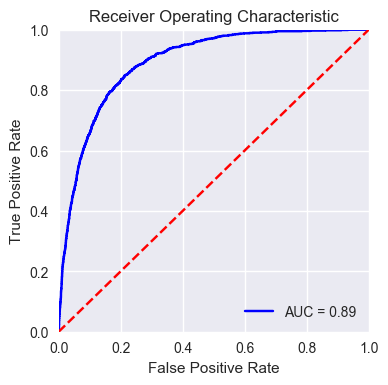

In [193]:
rocplots(lr, X_train_PC, Y_train)

## LDA

In [79]:
# Make predictions on validation dataset by choosing best Algorithm
from sklearn.cross_validation import cross_val_score
lda = LinearDiscriminantAnalysis()
scores = cross_val_score(lr,X_train_PC, Y_train, cv =10, scoring = 'accuracy')
scores.mean()

0.89186568710161196

In [81]:
lda.fit(X_train_PC, Y_train)
predictions = lda.predict(X_validation_PC)
print("Accuracy : ", accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

Accuracy :  0.884441004092
[[7688  339]
 [ 706  310]]
             precision    recall  f1-score   support

         no       0.92      0.96      0.94      8027
        yes       0.48      0.31      0.37      1016

avg / total       0.87      0.88      0.87      9043



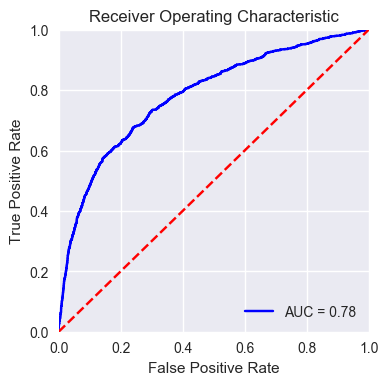

In [82]:
rocplots(lda)

## Random forest

In [94]:
# Make predictions on validation dataset by choosing best Algorithm
from sklearn.cross_validation import cross_val_score
rf = RandomForestClassifier()
scores = cross_val_score(rf,X_train_PC, Y_train, cv =10, scoring = 'accuracy')
scores.mean()

0.8859487151220371

In [95]:
rf.fit(X_train_PC, Y_train)
predictions = rf.predict(X_validation_PC)
print("Accuracy : ", accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

Accuracy :  0.868185336725
[[7666  361]
 [ 831  185]]
             precision    recall  f1-score   support

         no       0.90      0.96      0.93      8027
        yes       0.34      0.18      0.24      1016

avg / total       0.84      0.87      0.85      9043



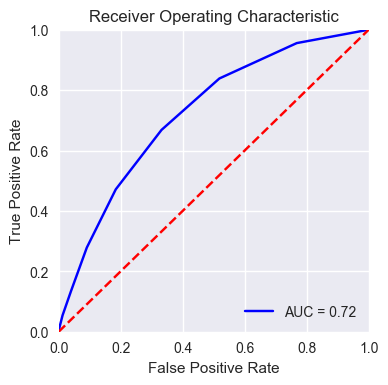

In [96]:
rocplots(rf)

### AUC is greater for Logistics Regression compared to other models

# SMOTE to account for imbalance

In [166]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state=42)
X_train, Y_train = sm.fit_sample(X_train, Y_train)
print('Resampled dataset shape {}'.format(Counter(Y_train)))
sm

Resampled dataset shape Counter({'no': 31895, 'yes': 31895})


SMOTE(k=None, k_neighbors=5, kind='regular', m=None, m_neighbors=10, n_jobs=1,
   out_step=0.5, random_state=42, ratio='auto', svm_estimator=None)

In [167]:
#Scaling the values
X_t = scale(X_train)
X_v = scale(X_validation)

#initially lets create 39 components which is actual number of Variables we have
pca = PCA(n_components=39)
pca.fit(X_v)
pca.fit(X_t)
pca = PCA(n_components=32)
pca.fit(X_t)
pca.fit(X_v)
X_train_PC=pca.fit_transform(X_t)
X_validation_PC = pca.transform(X_v)

## Logistics regression after smote

In [169]:
from sklearn.cross_validation import cross_val_score
lr = LogisticRegression()
scores = cross_val_score(lr,X_train, Y_train, cv =10, scoring = 'accuracy')
scores.mean()

0.82163394741524309

In [170]:
lr.fit(X_train_PC, Y_train)
predictions = lr.predict(X_validation_PC)
print('Confusion_Matrix: \n', confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

Confusion_Matrix: 
 [[5212 2815]
 [  68  948]]
             precision    recall  f1-score   support

         no       0.99      0.65      0.78      8027
        yes       0.25      0.93      0.40      1016

avg / total       0.90      0.68      0.74      9043



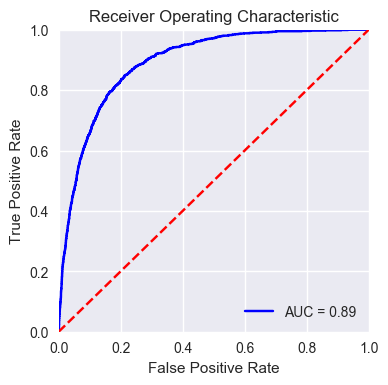

In [147]:
rocplots(lr)

In [159]:
# Make predictions on validation dataset by choosing best Algorithm
from sklearn.cross_validation import cross_val_score
rf = RandomForestClassifier()
scores = cross_val_score(rf,X_train, Y_train, cv =10, scoring = 'accuracy')
print(scores)

[ 0.56222571  0.87241379  0.98260188  0.98119122  0.97978056  0.9800878
  0.98024459  0.97977422  0.98291     0.98385074]


In [160]:
rf.fit(X_train_PC, Y_train)
predictions = rf.predict(X_validation_PC)
print('Confusion_Matrix: \n', confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

Confusion_Matrix: 
 [[6258 1769]
 [ 355  661]]
             precision    recall  f1-score   support

         no       0.95      0.78      0.85      8027
        yes       0.27      0.65      0.38      1016

avg / total       0.87      0.77      0.80      9043



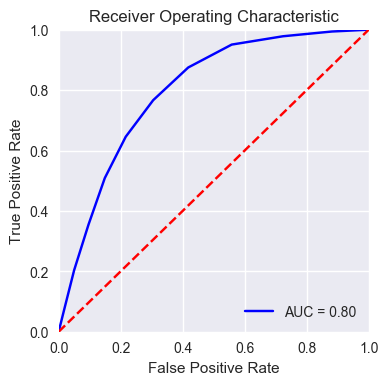

In [163]:
rocplots(rf,X_train_PC, Y_train)

## LDA

In [151]:
# Make predictions on validation dataset by choosing best Algorithm
from sklearn.cross_validation import cross_val_score
lda = LinearDiscriminantAnalysis()
scores = cross_val_score(lr,X_train_PC, Y_train, cv =10, scoring = 'accuracy')
scores.mean()

0.82147725675347572

In [152]:
lda.fit(X_train_PC, Y_train)
predictions = lda.predict(X_validation_PC)
print('Confusion_Matrix: \n', confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

Confusion_Matrix: 
 [[5447 2580]
 [  79  937]]
             precision    recall  f1-score   support

         no       0.99      0.68      0.80      8027
        yes       0.27      0.92      0.41      1016

avg / total       0.90      0.71      0.76      9043



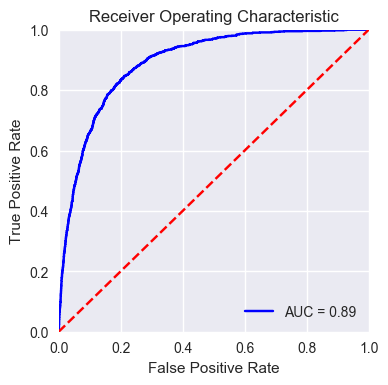

In [164]:
rocplots(lda, X_train_PC, Y_train)

## Conclusion
## After compelete analysis I found out that logistics regression performs better in terms of AUC (0.89) as well
## Random forest works better if we consider False positive rate

## Further improvements:
    -Tuning hyperparameters of each model (Lasso/ridge regression, etc)
    -Implementin models such as SVM(SVD) and Neural Networks